<a href="https://colab.research.google.com/github/reeda23/OpenCV102--Basic-Image-Processing-Operations/blob/main/2_smoothing_and_blurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import packages
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
#function for displaying images

def plt_showimage(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

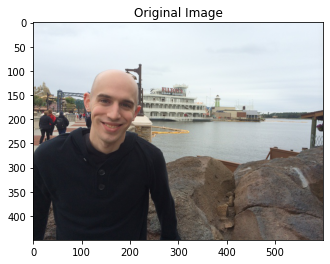

In [3]:
#Read image from the disk
image = cv2.imread('/content/drive/MyDrive/OpenCV102 - Basic Image Processing Operations/adrian.png')
plt_showimage("Original Image", image)

**Average Blurring**

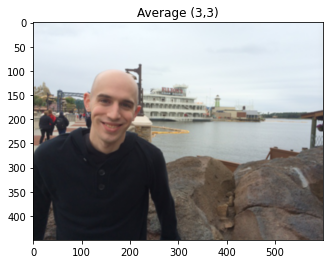

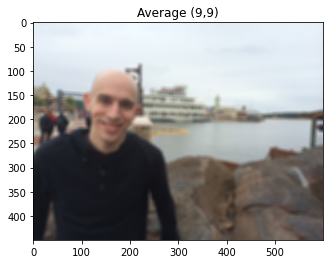

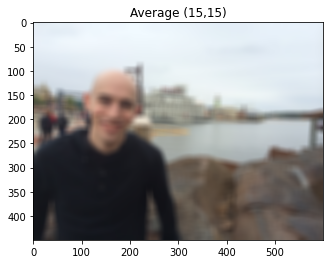

In [4]:
#cv2.blurr
#we define list of kernel sizes to see how kernel size affect the amount of blurring

kernelSizes = [(3,3), (9,9),(15,15)]

for (kX, kY) in kernelSizes:

    blurred = cv2.blur(image, (kX,kY))
    plt_showimage("Average ({},{})".format(kX,kY), blurred)

Gaussian Blur

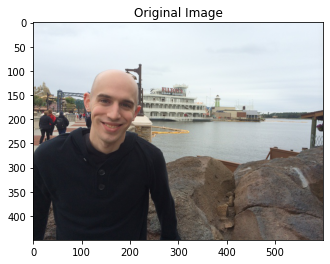

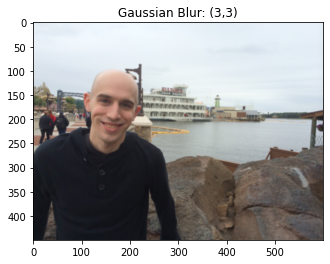

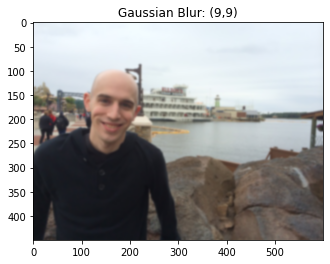

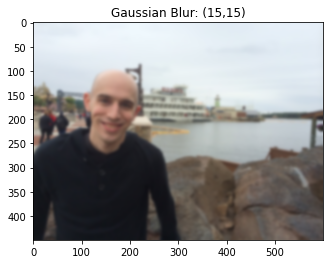

In [6]:
plt_showimage("Original Image", image)

for (kX, kY) in kernelSizes:

    blurred = cv2.GaussianBlur(image, (kX, kY), 0) #0 mean cv2 automatically controls the value of standard deviation with respect to kernel
    plt_showimage("Gaussian Blur: ({},{})".format(kX, kY), blurred)

Median Blur

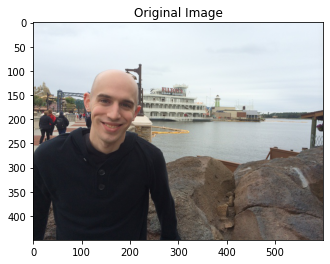

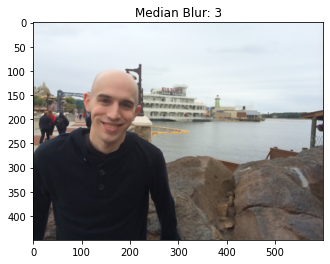

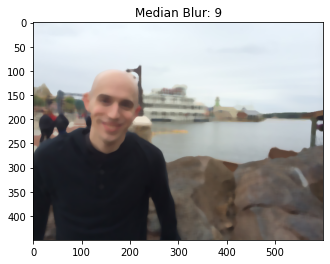

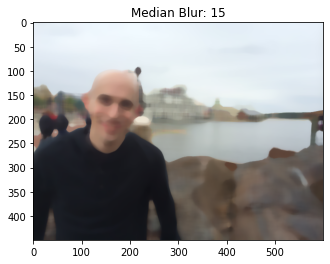

In [7]:
plt_showimage("Original Image", image)

#this kind of filter is used to tackle salt and paper noise 

for k in (3,9,15): #cv2 forces median Blur to have square kernel sizes we can't use rectanglur kernel size like (3,15)
#(3,9,15) == (3,3), (9,9), (15,15s)
    blurred = cv2.medianBlur(image, k)
    plt_showimage("Median Blur: {}".format(k), blurred)

**Bilateral blurring**

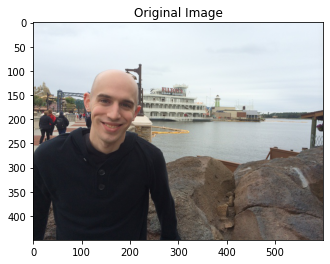

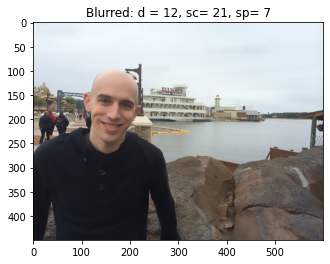

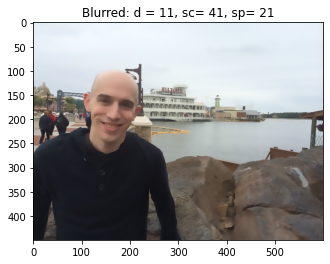

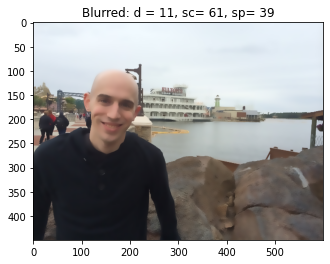

In [9]:
plt_showimage("Original Image", image)

#parameters that we will use for blurring
#first number is diameter - the larger this diameter is, the more pixels will be included in the blurring computation
#second number is sigma color - A larger value for sigma_color means that more colors in the neighborhood will be considered when computing the blur
#third number is sigma space - A larger value of sigma_space means that pixels farther out from the central pixel diameter will influence the blurring calculation
params = [(12,21,7),(11,41,21),(11,61,39)]

for (diameter, sigma_color, sigma_space) in params:
    blurred = cv2.bilateralFilter(image, diameter,sigma_color,sigma_space)
    plt_showimage("Blurred: d = {}, sc= {}, sp= {}".format(diameter,sigma_color,sigma_space), blurred)